In [66]:
import pandas as pd
import numpy as np

In [172]:
log = pd.read_csv('../data/log.xls', header=None, names=['user_id', 'time', 'bet', 'win'])
log.time =log.time.str.replace('[', '')
log.time = pd.to_datetime(log.time)
log.head()

,user_id,time,bet,win
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN


In [68]:
users = pd.read_csv('../data/users.xls', encoding="koi8-r", sep='\t', names=['user_id', 'email', 'geo'])
users.head()

,user_id,email,geo
0,Юзверь,мейл,Гео
1,User_943,Accumanst@gmail.com,Ижевск
2,User_908,Advismowr@mail.ru,Ижевск
3,User_962,Anachso@ukr.net,Краснодар
4,User_973,Antecia@inbox.ru,Пермь


In [69]:
sum(log.time.isna())

15

In [70]:
log_backup = log.copy()
log_backup.dropna(axis=1).shape

(1000, 1)

In [71]:
log_backup = log.copy()
log_backup.dropna(axis=0).shape

(133, 4)

In [72]:
log_backup = log.copy()
for col in ['user_id', 'time']:
    if sum(log_backup[col].isna()) > 0:
        log_backup.drop(col, axis=1, inplace=True)
log_backup.shape

(1000, 3)

In [73]:
log_backup = log.copy()
log_backup.drop_duplicates(subset=['user_id', 'time']).shape

(986, 4)

In [74]:
log.time.max().hour

18

In [75]:
# log = pd.read_csv('../data/log.xls', header=None, names=['user_id', 'time', 'bet', 'win'])
# log = log.dropna()  
# log.columns = ['user_id', 'time', 'bet', 'win']  
# log['time'] = log['time'].apply(lambda x: x[1:])  
# log['time'] = pd.to_datetime(log['time'])  
# log['time'] = log['time'].apply(lambda x: x.minute)
# log.time.head()

In [80]:
log['time'].dt.minute.value_counts().index[0]

36.0

In [84]:
log['time'].dt.month.value_counts(ascending=True).index[0]

4.0

In [95]:
log.time.dt.dayofweek.value_counts()[[5, 6]].sum()

283

In [102]:
def time_to_daytime(value):
    if 0 <= value < 6:
        return 'night'
    elif 6 <= value < 12:
        return 'morning'
    elif 12 <= value < 18:
        return 'afternoon'
    elif 18 <= value < 24:
        return 'evening'

In [107]:
log_backup = log.copy()
log_backup.dropna(axis=0, subset=['time'], inplace=True)
log_backup['time_of_day'] = log_backup.time.dt.hour.apply(time_to_daytime)
log_backup.time_of_day.value_counts().index[-1]

'evening'

In [118]:
log.bet.fillna(0).value_counts()[0]

515

In [126]:
log.bet[0]

nan

In [128]:
import math

def fill_win(win, bet):
    if not math.isnan(win):
        return win
    else:
        if math.isnan(bet):
            return 0
        else:
            return -bet

In [136]:
log['win'] = log.apply(lambda row: fill_win(row.win, row.bet), axis=1)

In [142]:
log[log.win < 0].shape[0]

347

In [143]:
def calculate_sum_win(win, bet):
    if win < 0:
        return win
    else:
        return win - bet
    
log['net'] = log.apply(lambda row: calculate_sum_win(row.win, row.bet), axis=1)

In [146]:
round(log[log.win > 0].net.mean(), 0)

80253.0

In [147]:
round(log[log.win > 0].net.median(), 0)

5347.0

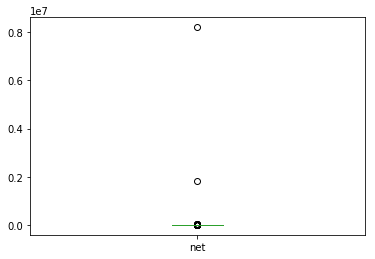

In [165]:
net_above_0 = log[log.win > 0]
net_above_0.net.plot('box')

In [166]:
log.bet.mean(skipna=True)

6785.738144329897

In [167]:
log['bet'].dropna().mean()

6785.738144329897

In [168]:
log.bet.sum() / log.bet.dropna().shape[0]

6785.738144329897

In [169]:
np.mean(log.bet)

6785.738144329897

In [171]:
log.bet.mean()

6785.738144329897

In [188]:
log_backup = log.copy()
log_backup[['win', 'bet']] = log_backup[['win', 'bet']].fillna(0)
log_backup['net'] = log_backup.win - log_backup.bet

In [184]:
log_backup[log_backup.bet > 0].shape[0] * 100 / len(log_backup)

48.5

In [192]:
log_backup[log_backup.bet > 0].net.mean()

20421.892783505155

In [193]:
log_backup[log_backup.net < 0].net.mean()

-3372.743515850144

In [195]:
print(f"% of loses = {log_backup[log_backup.net < 0].shape[0] * 100 / len(log_backup)}")
print(f"% of wins = {log_backup[log_backup.net > 0].shape[0] * 100 / len(log_backup)}")

% of loses = 34.7
% of wins = 13.8


In [ ]:
log_backup = pd.read_csv('log.csv', header=None, names=['user_id', 'time', 'bet', 'win'])
min_bet = log_backup.bet.min()
min_bet_amount = log_backup[log_backup.bet == min_bet].shape[0]

In [310]:
log = pd.read_csv('../data/log.xls', header=None, names=['user_id', 'time', 'bet', 'win'])
log.time =log.time.str.replace('[', '')
log.time = pd.to_datetime(log.time)
log.head()

,user_id,time,bet,win
0,Запись пользователя № - user_919,2019-01-01 14:06:51,NaN,NaN
1,Запись пользователя № - user_973,2019-01-01 14:51:16,NaN,NaN
2,Запись пользователя № - user_903,2019-01-01 16:31:16,NaN,NaN
3,Запись пользователя № - user_954,2019-01-01 17:17:51,NaN,NaN
4,Запись пользователя № - user_954,2019-01-01 21:31:18,NaN,NaN


In [311]:
users = pd.read_csv('../data/users.xls', encoding="koi8-r", sep='\t', names=['user_id', 'email', 'geo'])
users.head()

,user_id,email,geo
0,Юзверь,мейл,Гео
1,User_943,Accumanst@gmail.com,Ижевск
2,User_908,Advismowr@mail.ru,Ижевск
3,User_962,Anachso@ukr.net,Краснодар
4,User_973,Antecia@inbox.ru,Пермь


In [312]:
# Приведем признак user_id к одному формату в обоих датасетах  
users.user_id = users.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])

In [313]:
df = pd.merge(users, log, on='user_id')

In [203]:
df.shape

(975, 6)

In [204]:
df.groupby('user_id').win.median().median()  

5951.75

In [209]:
df[['win', 'bet']] = df[['win', 'bet']].fillna(0)
df['net'] = df.apply(lambda row: calculate_sum_win(row.win, row.bet), axis=1)

In [210]:
df.head()

,user_id,email,geo,time,bet,win,net
0,user_943,Accumanst@gmail.com,Ижевск,2019-01-06 21:06:57,0.0,0.0,0.0
1,user_943,Accumanst@gmail.com,Ижевск,2019-01-10 12:16:22,100.0,0.0,-100.0
2,user_943,Accumanst@gmail.com,Ижевск,2019-01-27 01:18:47,100.0,0.0,-100.0
3,user_943,Accumanst@gmail.com,Ижевск,2019-02-10 11:09:24,100.0,5456.0,5356.0
4,user_943,Accumanst@gmail.com,Ижевск,2019-02-12 15:09:38,300.0,5245.0,4945.0


In [211]:
df.groupby('user_id').net.sum().median()

1986.0

In [244]:
no_bets_per_person = []
for user in df.user_id.unique():
    data = df[df.user_id == user]
    no_bets = len(data[data.bet == 0])
    if no_bets < len(data):
        no_bets_per_person.append(no_bets)
np.mean(no_bets_per_person)

In [ ]:
# another solution
# после преобразований объединили данные из двух файлов
users_log = pd.merge(log, users, on ='user_id')
# создаем два датафрейма для подсчета случаев нулевой ставки
group = users_log[users_log.bet==0].groupby('user_id').bet.count() 
group_not_null = users_log[users_log.bet>0].groupby('user_id').bet.count()
# и объединяем по user_id
joined=pd.merge(group, group_not_null, on=['user_id'])
# Оставим только те строки, в которых у посетителя была хотя бы одна ставка
joined = joined[joined['bet_y']>0]
# И посчитаем среднее количество приходов без ставки
joined['bet_x'].sum()/len(joined)

In [248]:
group = df[df.bet==0].groupby('user_id').bet.count() 
group_not_null = df[df.bet>0].groupby('user_id').bet.count()
joined=pd.merge(group, group_not_null, on=['user_id'])

In [251]:
joined.index

Index(['user_1000', 'user_900', 'user_901', 'user_902', 'user_903', 'user_904',
       'user_905', 'user_906', 'user_907', 'user_908', 'user_909', 'user_910',
       'user_911', 'user_912', 'user_913', 'user_914', 'user_915', 'user_916',
       'user_917', 'user_918', 'user_919', 'user_920', 'user_921', 'user_922',
       'user_923', 'user_924', 'user_925', 'user_926', 'user_927', 'user_928',
       'user_929', 'user_930', 'user_931', 'user_932', 'user_933', 'user_934',
       'user_935', 'user_936', 'user_937', 'user_938', 'user_939', 'user_940',
       'user_941', 'user_942', 'user_943', 'user_944', 'user_945', 'user_946',
       'user_947', 'user_948', 'user_949', 'user_950', 'user_951', 'user_952',
       'user_953', 'user_954', 'user_955', 'user_957', 'user_958', 'user_959',
       'user_960', 'user_961', 'user_962', 'user_963', 'user_964', 'user_965',
       'user_966', 'user_967', 'user_968', 'user_969', 'user_970', 'user_971',
       'user_972', 'user_973', 'user_974', 'user_97

In [279]:
time = []
df.sort_values('user_id', inplace=True)
for user in df.user_id.unique():
    data = df[df.user_id == user]
    no_bets = len(data[data.bet == 0])
    if no_bets < len(data):
        min_time_zero_bets = data[data.bet == 0].time.min()
        min_time_norm_bets = data[data.bet != 0].time.min()
        if min_time_norm_bets > min_time_zero_bets:
            time.append(min_time_norm_bets - min_time_zero_bets)
        else: 
            time.append(pd.Timedelta(0))
np.mean(time)

Timedelta('47 days 01:34:33.930000')

In [301]:
mean_bets_per_city = df[df.bet > 0].groupby('geo').bet.mean()
mean_bets_per_city.max() / mean_bets_per_city.min()

127.81602335164835

In [304]:
# log = pd.read_csv("../data/log.xls", header=None, names=['user_id','time','bet','win'])
# users = pd.read_csv("../data/users.xls", encoding='KOI8-R', sep='\t', names=['user_id','email','geo'])

# users.user_id = users.user_id.apply(lambda x: x.lower())  
# log = log[log.user_id != '#error']  
# log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

# df = pd.merge(log, users, on ='user_id')

# sample2 = df.groupby('geo').user_id.count()

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: user_id, dtype: int64

In [321]:
df['time'].dt.minute.value_counts()

36    25
31    22
14    21
18    21
6     21
12    21
5     21
50    21
40    21
43    21
2     20
58    20
29    20
53    20
57    20
48    20
56    19
21    19
27    19
45    19
54    18
3     18
20    18
9     18
35    18
34    18
33    18
47    17
10    17
51    17
55    16
25    16
17    16
28    15
37    15
15    15
16    15
30    15
49    15
4     14
44    14
32    14
19    14
24    14
38    14
7     13
1     13
59    13
41    13
23    12
39    12
0     12
13    11
22    11
42    11
46    10
52    10
8      9
26     9
11     6
Name: time, dtype: int64